In [1]:
import pandas as pd
import pandas_datareader.data as web
import datetime as dt

In [2]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# NLTK VADER for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
finwiz_url = 'https://finviz.com/quote.ashx?t='

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/otar/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
reuters = pd.read_csv('/Users/otar/Documents/test_conda/cnbc/reuters_headlines.csv')

In [189]:
reuters.head()
reuters.shape

(32770, 3)

In [5]:
reuters_aapl = reuters[reuters['Headlines'].str.contains('Apple')]
reuters_aapl.shape

(517, 3)

In [237]:
reuters_tech = reuters[reuters['Headlines'].str.contains('iPhone')]
reuters_tech.head()

,Headlines,Time,Description
1981,Broadcom's revenue forecast disappoints on pos...,Jun 04 2020,Broadcom Inc on Thursday forecast current-qua...
2066,Apple must face U.S. shareholder lawsuit over ...,Jun 03 2020,A federal judge said Apple Inc must face part ...
3577,"China discounts, cheaper iPhone to cushion App...",Apr 28 2020,Apple Inc's discounts on the iPhone 11 in Chi...
3823,"Flaw in iPhone, iPads may have allowed hackers...",Apr 22 2020,Apple Inc is planning to fix a flaw that a sec...
4122,"Goldman predicts 36% drop in iPhone shipment, ...",Apr 17 2020,Goldman Sachs said on Friday it expects iPhone...


In [239]:
#reuters_aapl_new = pd.merge(reuters_aapl, reuters_tech, on=reuters_aapl.index)
#reuters_aapl_new.shape

In [6]:
reuters_aapl = reuters_aapl.reset_index()
reuters_aapl.head()

,index,Headlines,Time,Description
0,100,Apple expands coding education programs to mor...,Jul 16 2020,Apple Inc said on Thursday it was working with...
1,125,EU's Vestager says court rulings on Apple taxe...,Jul 16 2020,The European Union's antitrust chief Margrethe...
2,161,"Apple expands news offerings with audio, local...",Jul 15 2020,Apple Inc on Wednesday expanded its news offe...
3,171,Blow for EU as Apple wins fight against $15 bi...,Jul 15 2020,Apple scored a major win on Wednesday as Europ...
4,185,Policymakers will tread carefully on tax refor...,Jul 15 2020,Policymakers will pay greater care to the lega...


In [92]:
# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

# Set column names
#columns = ['ticker', 'date', 'time', 'headline']

# Convert the parsed_news list into a DataFrame called 'parsed_and_scored_news'
#parsed_and_scored_news = pd.DataFrame(parsed_news, columns=columns)

# Iterate through the headlines and get the polarity scores using vader
scores = reuters_aapl['Headlines'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

# Join the DataFrames of the news and the list of dicts
reuters_aapl = reuters_aapl.join(scores_df, rsuffix='_right')
#print(reuters_aapl.isna().sum())
# Convert the date column from string to datetime
reuters_aapl['Time'] = pd.to_datetime(reuters_aapl.Time).dt.date

#reuters_aapl.head(5)
#reuters_aapl.Time.min()

In [13]:
plt.rcParams['figure.figsize'] = [20, 6]
#reuters_aapl.plot(x=reuters_aapl.Time, y=reuters_aapl.compound)
#plt.plot(reuters_aapl['Time'], reuters_aapl['compound'])

In [95]:
plt.rcParams['figure.figsize'] = [25, 8]
reuters_test = reuters_aapl.groupby(['Time']).mean()
reuters_test.index.min(), reuters_test.index.max() 
#g = sns.barplot(reuters_test.index, reuters_test['compound'])
#g.set_xticklabels(g.get_xticklabels(), rotation=45);

(datetime.date(2018, 3, 23), datetime.date(2020, 7, 16))

In [116]:
#reuters_aapl.head(10)

In [122]:
#reuters_aapl.groupby(['Time']).agg(['mean', 'count'])
reuters_test['news_amount'] = reuters_aapl.groupby(['Time']).count()['index']
reuters_test['comp_aggr'] = reuters_test['news_amount']*reuters_test['compound']
reuters_test.tail()

,index,neg,neu,pos,compound,neg_right,neu_right,pos_right,compound_right,neg_right,neu_right,pos_right,compound_right,news_amount,comp_aggr
Time,,,,,,,,,,,,,,,
2020-07-10,408.0,0.0000,0.960000,0.040000,0.042667,0.0000,0.960000,0.040000,0.042667,0.0000,0.960000,0.040000,0.042667,3,0.1280
2020-07-13,348.5,0.0000,1.000000,0.000000,0.000000,0.0000,1.000000,0.000000,0.000000,0.0000,1.000000,0.000000,0.000000,2,0.0000
2020-07-14,228.0,0.1910,0.809000,0.000000,-0.381800,0.1910,0.809000,0.000000,-0.381800,0.1910,0.809000,0.000000,-0.381800,1,-0.3818
2020-07-15,193.0,0.0705,0.799125,0.130375,0.078738,0.0705,0.799125,0.130375,0.078738,0.0705,0.799125,0.130375,0.078738,8,0.6299
2020-07-16,112.5,0.0000,0.932500,0.067500,0.051350,0.0000,0.932500,0.067500,0.051350,0.0000,0.932500,0.067500,0.051350,2,0.1027


In [123]:
#start = dt.datetime(2020,1,29)
#end = dt.datetime(2020,7,16)
df = web.DataReader('AAPL','yahoo',reuters_test.index.min(),reuters_test.index.max())
#sns.lineplot(df.index,df['Adj Close'])

In [124]:
reuters_test.index = pd.to_datetime(reuters_test.index)
df.index = pd.to_datetime(df.index)

In [125]:
df_plot = reuters_test.merge(df, how='inner', left_index=True, right_index=True)

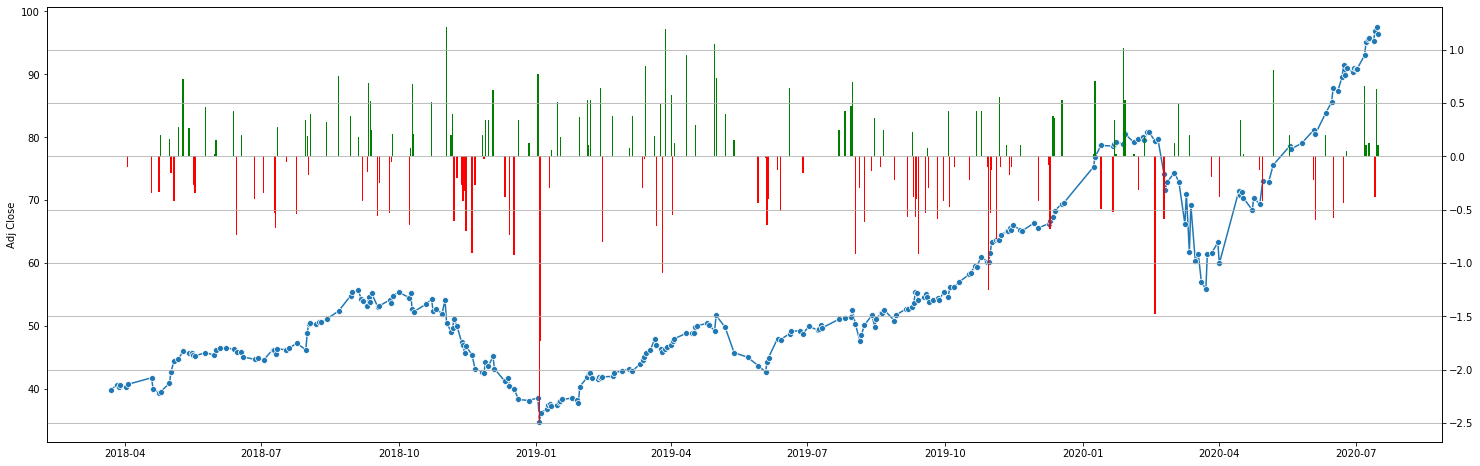

In [130]:
ax = sns.set_style(style=None, rc=None )
fig, ax = plt.subplots()
sns.lineplot(df_plot.index, df_plot['Adj Close'], marker='o', ax=ax)
ax2 = ax.twinx()
#sns.lineplot(df_plot.index, df_plot['compound'], color='r', ax=ax2 ,alpha=0.5)
plt.bar(df_plot.index, df_plot['comp_aggr'], color=(df_plot['compound'] > 0).map({True: 'g',
                                                    False: 'r'}))
ax2.grid(True)

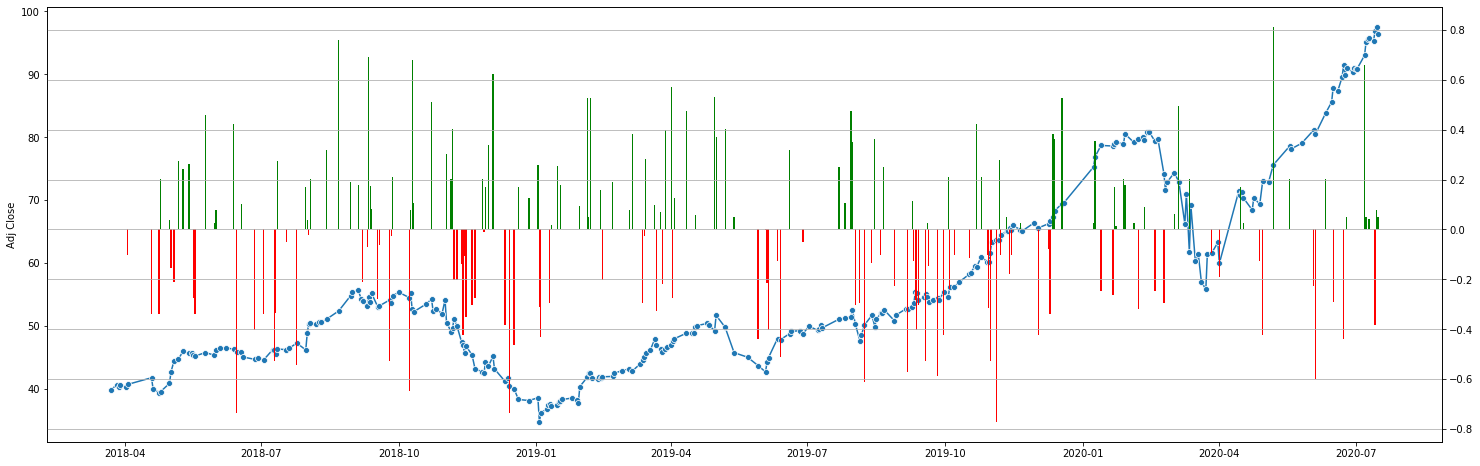

In [129]:
ax = sns.set_style(style=None, rc=None )
fig, ax = plt.subplots()
sns.lineplot(df_plot.index, df_plot['Adj Close'], marker='o', ax=ax)
ax2 = ax.twinx()
#sns.lineplot(df_plot.index, df_plot['compound'], color='r', ax=ax2 ,alpha=0.5)
plt.bar(df_plot.index, df_plot['compound'], color=(df_plot['compound'] > 0).map({True: 'g',
                                                    False: 'r'}))
ax2.grid(True)

In [134]:
import pickle

In [162]:
with open("aapl_rating_hist.pickle", "rb") as f:
        df_rating = pickle.load(f)

In [163]:
df_rating.head()

,symbol,date,rating,ratingScore,ratingRecommendation,ratingDetailsDCFScore,ratingDetailsDCFRecommendation,ratingDetailsROEScore,ratingDetailsROERecommendation,ratingDetailsROAScore,ratingDetailsROARecommendation,ratingDetailsDEScore,ratingDetailsDERecommendation,ratingDetailsPEScore,ratingDetailsPERecommendation,ratingDetailsPBScore,ratingDetailsPBRecommendation
0,AAPL,2020-10-23,S-,5,Strong Buy,5,Strong Buy,4,Buy,3,Neutral,5,Strong Buy,5,Strong Buy,5,Strong Buy
1,AAPL,2020-10-22,S-,5,Strong Buy,5,Strong Buy,4,Buy,3,Neutral,5,Strong Buy,5,Strong Buy,5,Strong Buy
2,AAPL,2020-10-21,S-,5,Strong Buy,5,Strong Buy,4,Buy,3,Neutral,5,Strong Buy,5,Strong Buy,5,Strong Buy
3,AAPL,2020-10-20,S-,5,Strong Buy,5,Strong Buy,4,Buy,3,Neutral,5,Strong Buy,5,Strong Buy,5,Strong Buy
4,AAPL,2020-10-19,S-,5,Strong Buy,5,Strong Buy,4,Buy,3,Neutral,5,Strong Buy,5,Strong Buy,5,Strong Buy


In [166]:
#df_rating = df_rating.set_index('date')
df_rating['date'] = pd.to_datetime(df_rating.date).dt.date
df_rating = df_rating.set_index('date')

In [168]:
df_rating.head()

,symbol,rating,ratingScore,ratingRecommendation,ratingDetailsDCFScore,ratingDetailsDCFRecommendation,ratingDetailsROEScore,ratingDetailsROERecommendation,ratingDetailsROAScore,ratingDetailsROARecommendation,ratingDetailsDEScore,ratingDetailsDERecommendation,ratingDetailsPEScore,ratingDetailsPERecommendation,ratingDetailsPBScore,ratingDetailsPBRecommendation
date,,,,,,,,,,,,,,,,
2020-10-23,AAPL,S-,5,Strong Buy,5,Strong Buy,4,Buy,3,Neutral,5,Strong Buy,5,Strong Buy,5,Strong Buy
2020-10-22,AAPL,S-,5,Strong Buy,5,Strong Buy,4,Buy,3,Neutral,5,Strong Buy,5,Strong Buy,5,Strong Buy
2020-10-21,AAPL,S-,5,Strong Buy,5,Strong Buy,4,Buy,3,Neutral,5,Strong Buy,5,Strong Buy,5,Strong Buy
2020-10-20,AAPL,S-,5,Strong Buy,5,Strong Buy,4,Buy,3,Neutral,5,Strong Buy,5,Strong Buy,5,Strong Buy
2020-10-19,AAPL,S-,5,Strong Buy,5,Strong Buy,4,Buy,3,Neutral,5,Strong Buy,5,Strong Buy,5,Strong Buy


In [188]:
df_rating['ratingRecommendation'].unique()

array(['Strong Buy', 'Buy', 'Neutral'], dtype=object)

In [170]:
#df_rating.loc['2018-03-23':'2020-07-16']
df_rating.loc[dt.date(year=2018,month=3,day=23):dt.date(year=2020,month=7,day=16)]

,symbol,rating,ratingScore,ratingRecommendation,ratingDetailsDCFScore,ratingDetailsDCFRecommendation,ratingDetailsROEScore,ratingDetailsROERecommendation,ratingDetailsROAScore,ratingDetailsROARecommendation,ratingDetailsDEScore,ratingDetailsDERecommendation,ratingDetailsPEScore,ratingDetailsPERecommendation,ratingDetailsPBScore,ratingDetailsPBRecommendation
date,,,,,,,,,,,,,,,,


In [198]:
df_plot_1 = df_plot.merge(df_rating, how='inner', left_index=True, right_index=True)
df_plot_1.head()

,index,neg,neu,pos,compound,neg_right,neu_right,pos_right,compound_right,neg_right,...,ratingDetailsROEScore,ratingDetailsROERecommendation,ratingDetailsROAScore,ratingDetailsROARecommendation,ratingDetailsDEScore,ratingDetailsDERecommendation,ratingDetailsPEScore,ratingDetailsPERecommendation,ratingDetailsPBScore,ratingDetailsPBRecommendation
2018-03-23,32556.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,4,Buy,3,Neutral,4,Buy,5,Strong Buy,5,Strong Buy
2018-03-27,32387.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,4,Buy,3,Neutral,4,Buy,5,Strong Buy,5,Strong Buy
2018-03-28,32373.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,4,Buy,3,Neutral,4,Buy,5,Strong Buy,5,Strong Buy
2018-03-29,32287.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,4,Buy,3,Neutral,4,Buy,5,Strong Buy,5,Strong Buy
2018-04-02,32205.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,4,Buy,3,Neutral,5,Strong Buy,5,Strong Buy,5,Strong Buy


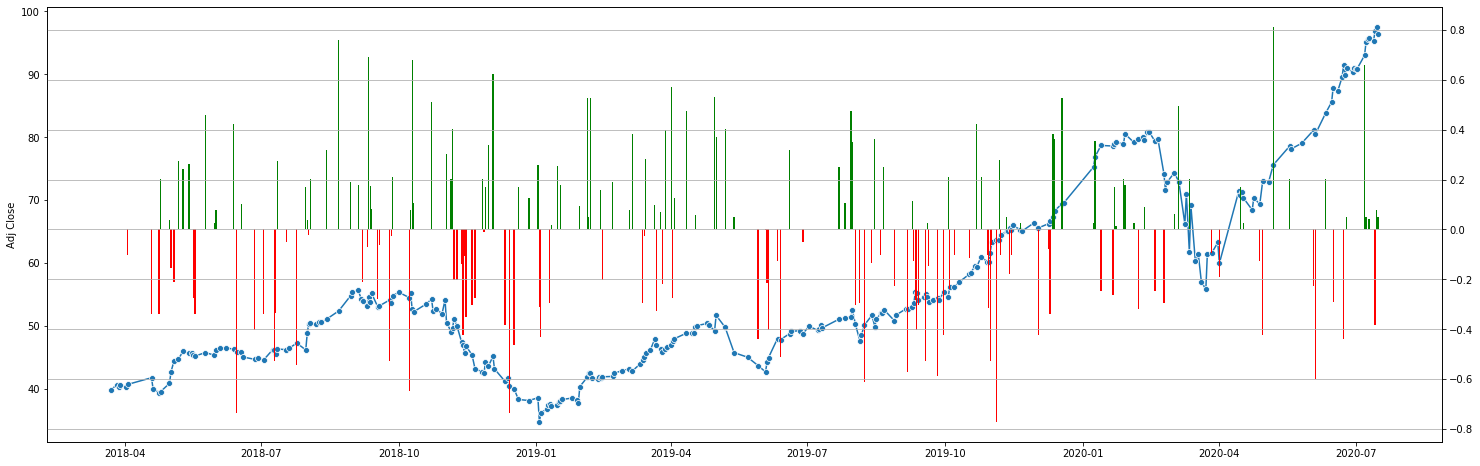

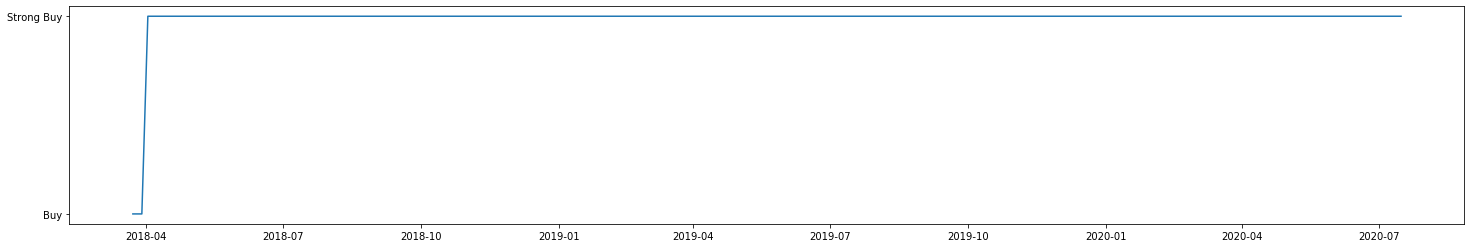

In [240]:
plt.rcParams['figure.figsize'] = [25, 8]
ax = sns.set_style(style=None, rc=None )
fig, ax = plt.subplots()
sns.lineplot(df_plot_1.index, df_plot_1['Adj Close'], marker='o', ax=ax)
ax2 = ax.twinx()
#sns.lineplot(df_plot.index, df_plot['compound'], color='r', ax=ax2 ,alpha=0.5)
plt.bar(df_plot_1.index, df_plot_1['compound'], color=(df_plot_1['compound'] > 0).map({True: 'g',
                                                    False: 'r'}))
ax2.grid(True)

fig2 = plt.subplots(figsize=(25,4))
#plt.figure(figsize=(20,4))
plt.plot(df_plot_1.index, df_plot_1['ratingRecommendation'])
plt.show()

In [191]:
#plt.plot(df_plot_1.index, df_plot_1['ratingRecommendation'])